In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/05_May.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,25.000000,35.000000,1,2,1,2580.0,2455.0,2410.0,2742.0,2967.0,2780.0,2503.083333,2542.0
1,24.833333,35.583333,1,2,1,2569.0,2491.0,2394.0,2722.0,2956.0,2770.0,2514.666667,2533.0
2,24.666667,36.166667,1,2,1,2570.0,2459.0,2433.0,2722.0,2945.0,2775.0,2523.416667,2538.0
3,24.500000,36.750000,1,2,1,2576.0,2534.0,2434.0,2733.0,2922.0,2790.0,2527.916667,2488.0
4,24.333333,37.333333,2,2,1,2542.0,2580.0,2455.0,2713.0,2896.0,2789.0,2533.833333,2526.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8923,34.192450,30.085943,23,6,1,3951.0,3911.0,3809.0,3959.0,3932.0,3833.0,3927.416667,3961.0
8924,34.192450,30.085943,24,6,1,3945.0,3938.0,3858.0,3970.0,3903.0,3766.0,3935.750000,3958.0
8925,34.192450,30.085943,24,6,1,3968.0,3940.0,3849.0,3955.0,3851.0,3754.0,3939.750000,3897.0
8926,33.190000,30.085943,24,6,1,3972.0,3935.0,3901.0,3896.0,3741.0,3683.0,3941.416667,3921.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   int64  
 3   B       8928 non-null   int64  
 4   C       8928 non-null   int64  
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 906.9 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8928 entries, 0 to 8927
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8928 non-null   float64
 1   Hum     8928 non-null   float64
 2   A       8928 non-null   float64
 3   B       8928 non-null   float64
 4   C       8928 non-null   float64
 5   D       8928 non-null   float64
 6   E       8928 non-null   float64
 7   F       8928 non-null   float64
 8   G       8928 non-null   float64
 9   H       8928 non-null   float64
 10  I       8928 non-null   float64
 11  J       8928 non-null   float64
 12  Cons    8928 non-null   float64
dtypes: float64(13)
memory usage: 906.9 KB


In [6]:
T = 11
HORIZON = 1


In [7]:
train = stlf_data.copy()[stlf_data.index <= 7392][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head(105)
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.265577,-1.473924,-0.200042,-1.660902,-1.016087,0.632396,-1.154060,-1.517393,-1.647195,-0.637789,0.071547,-0.459631,-1.452229
1,-1.291801,-1.507662,-0.155244,-1.660902,-1.016087,0.632396,-1.186129,-1.412362,-1.693898,-0.696678,0.038496,-0.490385,-1.416623
2,-1.277232,-1.541400,-0.110446,-1.660902,-1.016087,0.632396,-1.183214,-1.505723,-1.580060,-0.696678,0.005444,-0.475008,-1.389726
3,-1.422922,-1.575138,-0.065648,-1.660902,-1.016087,0.632396,-1.165721,-1.286909,-1.577141,-0.664289,-0.063664,-0.428877,-1.375894
4,-1.312198,-1.608877,-0.020851,-1.516457,-1.016087,0.632396,-1.264846,-1.152703,-1.515843,-0.723178,-0.141786,-0.431952,-1.357706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,-0.700299,-1.204018,0.593520,-1.516457,-0.497987,0.632396,-0.442695,-0.954311,-1.279409,-1.273787,-0.691646,-0.102885,-0.721661
101,-0.758575,-1.237756,0.619119,-1.516457,-0.497987,0.632396,-0.498088,-0.624631,-1.127624,-1.332676,-0.799815,-0.161318,-0.688872
102,-0.767316,-1.271494,0.644718,-1.516457,-0.497987,0.632396,-0.524327,-0.306620,-0.978758,-1.365064,-0.808829,-0.176695,-0.669916
103,-0.886782,-1.305233,0.670316,-1.516457,-0.497987,0.632396,-0.591382,-0.586703,-0.873677,-1.373898,-0.971083,-0.198222,-0.670685


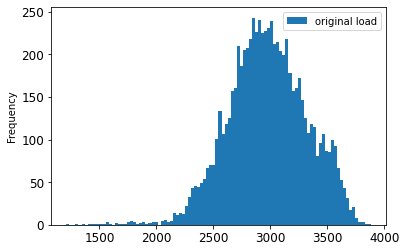

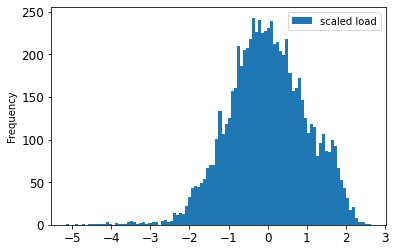

In [9]:
stlf_data[stlf_data.index <= 7392][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 7392][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

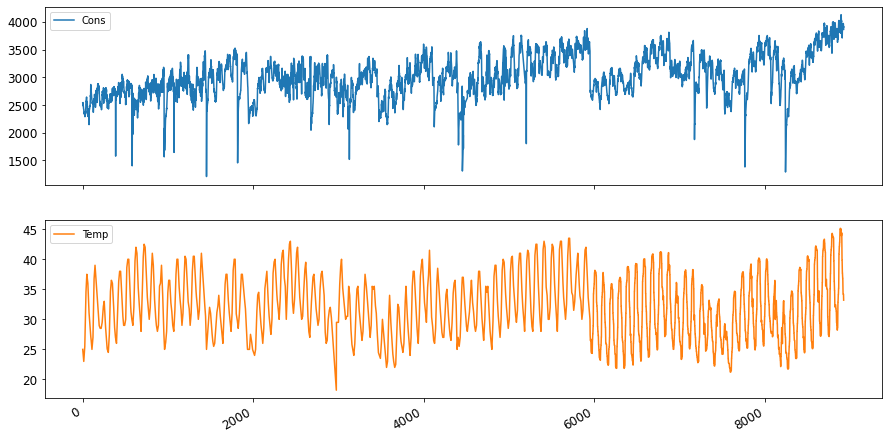

In [10]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [11]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.265577,-1.473924,-0.200042,-1.660902,-1.016087,0.632396,-1.154060,-1.517393,-1.647195,-0.637789,0.071547,-0.459631,-1.452229,-0.700299
1,-1.291801,-1.507662,-0.155244,-1.660902,-1.016087,0.632396,-1.186129,-1.412362,-1.693898,-0.696678,0.038496,-0.490385,-1.416623,-0.758575
2,-1.277232,-1.541400,-0.110446,-1.660902,-1.016087,0.632396,-1.183214,-1.505723,-1.580060,-0.696678,0.005444,-0.475008,-1.389726,-0.767316
3,-1.422922,-1.575138,-0.065648,-1.660902,-1.016087,0.632396,-1.165721,-1.286909,-1.577141,-0.664289,-0.063664,-0.428877,-1.375894,-0.886782
4,-1.312198,-1.608877,-0.020851,-1.516457,-1.016087,0.632396,-1.264846,-1.152703,-1.515843,-0.723178,-0.141786,-0.431952,-1.357706,-0.968369
5,-1.370474,-1.642615,0.023947,-1.516457,-1.016087,0.632396,-1.291085,-1.184795,-1.410761,-0.829177,-0.198876,-0.619551,-1.353864,-1.006248
6,-1.402526,-1.676353,0.068745,-1.516457,-1.016087,0.632396,-1.276508,-1.181878,-1.504167,-0.838011,-0.213899,-0.588797,-1.344642,-1.049956
7,-1.411267,-1.710091,0.113543,-1.516457,-1.016087,0.632396,-1.422279,-1.164373,-1.285247,-0.997010,-0.234932,-0.659531,-1.355401,-1.073266
8,-1.478285,-1.743830,0.158341,-1.372011,-1.016087,0.632396,-1.311493,-1.263569,-1.150976,-1.017621,-0.373148,-0.699512,-1.383835,-1.128628
9,-1.527819,-1.777568,0.203139,-1.372011,-1.016087,0.632396,-1.369801,-1.289826,-1.183084,-1.097121,-0.436247,-0.840980,-1.413805,-1.157766


In [12]:
for t in range(1, T+1):
    train_shifted['Cons_t-'+str(T-t)] = train_shifted['Cons'].shift(T-t)
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
0,-1.265577,-1.473924,-0.200042,-1.660902,-1.016087,0.632396,-1.154060,-1.517393,-1.647195,-0.637789,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577
1,-1.291801,-1.507662,-0.155244,-1.660902,-1.016087,0.632396,-1.186129,-1.412362,-1.693898,-0.696678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801
2,-1.277232,-1.541400,-0.110446,-1.660902,-1.016087,0.632396,-1.183214,-1.505723,-1.580060,-0.696678,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232
3,-1.422922,-1.575138,-0.065648,-1.660902,-1.016087,0.632396,-1.165721,-1.286909,-1.577141,-0.664289,...,NaN,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922
4,-1.312198,-1.608877,-0.020851,-1.516457,-1.016087,0.632396,-1.264846,-1.152703,-1.515843,-0.723178,...,NaN,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198
5,-1.370474,-1.642615,0.023947,-1.516457,-1.016087,0.632396,-1.291085,-1.184795,-1.410761,-0.829177,...,NaN,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474
6,-1.402526,-1.676353,0.068745,-1.516457,-1.016087,0.632396,-1.276508,-1.181878,-1.504167,-0.838011,...,NaN,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526
7,-1.411267,-1.710091,0.113543,-1.516457,-1.016087,0.632396,-1.422279,-1.164373,-1.285247,-0.997010,...,NaN,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267
8,-1.478285,-1.743830,0.158341,-1.372011,-1.016087,0.632396,-1.311493,-1.263569,-1.150976,-1.017621,...,NaN,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285
9,-1.527819,-1.777568,0.203139,-1.372011,-1.016087,0.632396,-1.369801,-1.289826,-1.183084,-1.097121,...,-1.265577,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819


In [13]:
train_shifted = train_shifted.dropna(how='any')
train_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
10,-1.597751,-1.811306,0.247937,-1.372011,-1.016087,0.632396,-1.401871,-1.275239,-1.180165,-1.120676,...,-1.291801,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819,-1.597751
11,-1.615234,-1.845044,0.292734,-1.372011,-1.016087,0.632396,-1.410617,-1.421115,-1.162652,-1.153065,...,-1.277232,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819,-1.597751,-1.615234
12,-1.626889,-1.878782,0.337532,-1.227565,-1.016087,0.632396,-1.477672,-1.310249,-1.261895,-1.173676,...,-1.422922,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819,-1.597751,-1.615234,-1.626889
13,-1.690993,-1.836610,0.273535,-1.227565,-1.016087,0.632396,-1.527235,-1.368599,-1.288166,-1.270843,...,-1.312198,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819,-1.597751,-1.615234,-1.626889,-1.690993
14,-1.758010,-1.794437,0.209538,-1.227565,-1.016087,0.632396,-1.597205,-1.400692,-1.273571,-1.365064,...,-1.370474,-1.402526,-1.411267,-1.478285,-1.527819,-1.597751,-1.615234,-1.626889,-1.690993,-1.758010


In [14]:
train_shifted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 10 to 7292
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Cons_original  7283 non-null   float64
 1   Temp           7283 non-null   float64
 2   Hum            7283 non-null   float64
 3   A              7283 non-null   float64
 4   B              7283 non-null   float64
 5   C              7283 non-null   float64
 6   D              7283 non-null   float64
 7   E              7283 non-null   float64
 8   F              7283 non-null   float64
 9   G              7283 non-null   float64
 10  H              7283 non-null   float64
 11  I              7283 non-null   float64
 12  J              7283 non-null   float64
 13  y_t+100        7283 non-null   float64
 14  Cons_t-10      7283 non-null   float64
 15  Cons_t-9       7283 non-null   float64
 16  Cons_t-8       7283 non-null   float64
 17  Cons_t-7       7283 non-null   float64
 18  Cons_t-

In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
10,-1.195646
11,-1.221870
12,-1.239353
13,-1.318026
14,-1.265577
...,...
7288,0.849845
7289,0.826535
7290,0.575947
7291,0.506016


In [16]:
X_train = train_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
10,-1.597751,-1.597751,-1.527819,-1.478285,-1.411267,-1.402526,-1.370474,-1.312198,-1.422922,-1.277232,...,-1.372011,-1.016087,0.632396,-1.401871,-1.275239,-1.180165,-1.120676,-0.514369,-0.911714,-1.450180
11,-1.615234,-1.615234,-1.597751,-1.527819,-1.478285,-1.411267,-1.402526,-1.370474,-1.312198,-1.422922,...,-1.372011,-1.016087,0.632396,-1.410617,-1.421115,-1.162652,-1.153065,-0.610519,-0.893261,-1.489629
12,-1.626889,-1.626889,-1.615234,-1.597751,-1.527819,-1.478285,-1.411267,-1.402526,-1.370474,-1.312198,...,-1.227565,-1.016087,0.632396,-1.477672,-1.310249,-1.261895,-1.173676,-0.667608,-1.043956,-1.521393
13,-1.690993,-1.690993,-1.626889,-1.615234,-1.597751,-1.527819,-1.478285,-1.411267,-1.402526,-1.370474,...,-1.227565,-1.016087,0.632396,-1.527235,-1.368599,-1.288166,-1.270843,-0.739721,-1.022428,-1.556486
14,-1.758010,-1.758010,-1.690993,-1.626889,-1.615234,-1.597751,-1.527819,-1.478285,-1.411267,-1.402526,...,-1.227565,-1.016087,0.632396,-1.597205,-1.400692,-1.273571,-1.365064,-0.757749,-1.074710,-1.598753
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,1.418037,1.418037,1.371416,1.409295,1.447175,1.327709,1.444261,1.385985,1.269433,1.193674,...,1.516906,-0.497987,0.632396,1.329886,1.198822,0.527413,-0.475845,0.972956,1.001181,1.309689
7289,1.461744,1.461744,1.418037,1.371416,1.409295,1.447175,1.327709,1.444261,1.385985,1.269433,...,1.516906,-0.497987,0.632396,1.449419,1.274678,0.600386,-0.369846,1.066102,0.832035,1.386025
7290,1.508365,1.508365,1.461744,1.418037,1.371416,1.409295,1.447175,1.327709,1.444261,1.385985,...,1.516906,-0.497987,0.632396,1.411518,1.391379,0.798874,-0.287401,1.186290,1.022709,1.449041
7291,1.464658,1.464658,1.508365,1.461744,1.418037,1.371416,1.409295,1.447175,1.327709,1.444261,...,1.516906,-0.497987,0.632396,1.373618,1.449729,1.225039,-0.184346,1.207323,1.065765,1.470814


In [17]:
X_train=np.atleast_3d(X_train)
X_train.shape

(7283, 24, 1)

In [18]:

#subsequences=2
#timesteps=X_train.shape[1]//subsequences
X_train=X_train.reshape(7283,2,1,12)
#print(X_train.shape)

In [19]:
valid = stlf_data.copy()[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,3038.0,26.322450,56.473970,1.0,5.0,1.0,3260.0,3308.0,3244.0,3247.0,2761.0,3184.0,3227.500000
7394,2979.0,25.472451,59.436812,1.0,5.0,1.0,3174.0,3290.0,3284.0,3227.0,2766.0,3145.0,3202.083333
7395,2950.0,24.622452,62.399654,1.0,5.0,1.0,3150.0,3294.0,3282.0,3217.0,2771.0,3162.0,3174.416667
7396,2926.0,24.622452,62.399654,2.0,5.0,1.0,3100.0,3268.0,3282.0,3139.0,2753.0,3161.0,3144.750000
7397,2894.0,24.622452,62.399654,2.0,5.0,1.0,3038.0,3260.0,3308.0,3095.0,2773.0,3143.0,3110.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8349,3071.0,26.602451,54.397984,24.0,7.0,0.0,3190.0,3185.0,3122.0,2015.0,3482.0,3614.0,3173.333333
8350,3040.0,26.422451,54.397984,24.0,7.0,0.0,3204.0,3186.0,3151.0,2058.0,3398.0,3540.0,3164.083333
8351,3054.0,26.422451,53.836823,24.0,7.0,0.0,3211.0,3179.0,3163.0,2093.0,3349.0,3557.0,3155.000000
8352,3028.0,26.422451,53.836823,1.0,1.0,0.0,3186.0,3161.0,3193.0,2151.0,3288.0,3467.0,3141.250000


In [20]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7393,-0.009734,-0.674267,0.461222,-1.658081,0.207546,0.657412,0.537878,0.655023,0.495584,0.444914,-0.972872,0.239313,0.482493
7394,-0.155734,-0.850025,0.644150,-1.658081,0.207546,0.657412,0.325109,0.610514,0.594449,0.393514,-0.958920,0.132598,0.416115
7395,-0.227497,-1.025783,0.827077,-1.658081,0.207546,0.657412,0.265731,0.620405,0.589506,0.367814,-0.944969,0.179115,0.343861
7396,-0.286887,-1.025783,0.827077,-1.513750,0.207546,0.657412,0.142028,0.556114,0.589506,0.167353,-0.995194,0.176378,0.266383
7397,-0.366074,-1.025783,0.827077,-1.513750,0.207546,0.657412,-0.011364,0.536332,0.653769,0.054272,-0.939388,0.127125,0.176283
7398,-0.383396,-1.063003,0.864081,-1.513750,0.207546,0.657412,-0.157333,0.323678,0.609279,0.393514,-0.925437,0.192796,0.088577
7399,-0.472481,-1.100222,0.901086,-1.513750,0.207546,0.657412,-0.229081,0.264332,0.619166,0.439774,-0.914275,0.124389,-0.007834
7400,-0.556617,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.288459,0.140696,0.554903,0.370384,-0.992404,0.132598,-0.105986
7401,-0.608583,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.367629,-0.012613,0.535130,0.462904,-0.805453,0.140807,-0.206968
7402,-0.559092,-1.261506,1.050127,-1.369419,0.207546,0.657412,-0.384947,-0.158504,0.322569,0.326694,-0.741276,0.201005,-0.284880


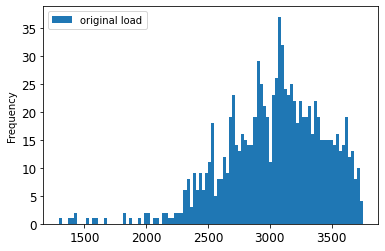

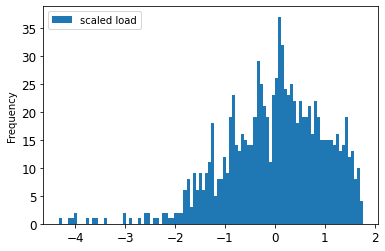

In [21]:
stlf_data[(stlf_data.index >=7393) & (stlf_data.index <=8353)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=7393) & (valid.index <=8353)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [22]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7393,-0.009734,-0.674267,0.461222,-1.658081,0.207546,0.657412,0.537878,0.655023,0.495584,0.444914,-0.972872,0.239313,0.482493,0.017487
7394,-0.155734,-0.850025,0.644150,-1.658081,0.207546,0.657412,0.325109,0.610514,0.594449,0.393514,-0.958920,0.132598,0.416115,0.047182
7395,-0.227497,-1.025783,0.827077,-1.658081,0.207546,0.657412,0.265731,0.620405,0.589506,0.367814,-0.944969,0.179115,0.343861,0.019961
7396,-0.286887,-1.025783,0.827077,-1.513750,0.207546,0.657412,0.142028,0.556114,0.589506,0.167353,-0.995194,0.176378,0.266383,0.019961
7397,-0.366074,-1.025783,0.827077,-1.513750,0.207546,0.657412,-0.011364,0.536332,0.653769,0.054272,-0.939388,0.127125,0.176283,-0.039429
7398,-0.383396,-1.063003,0.864081,-1.513750,0.207546,0.657412,-0.157333,0.323678,0.609279,0.393514,-0.925437,0.192796,0.088577,-0.140887
7399,-0.472481,-1.100222,0.901086,-1.513750,0.207546,0.657412,-0.229081,0.264332,0.619166,0.439774,-0.914275,0.124389,-0.007834,-0.002310
7400,-0.556617,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.288459,0.140696,0.554903,0.370384,-0.992404,0.132598,-0.105986,0.022436
7401,-0.608583,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.367629,-0.012613,0.535130,0.462904,-0.805453,0.140807,-0.206968,-0.155734
7402,-0.559092,-1.261506,1.050127,-1.369419,0.207546,0.657412,-0.384947,-0.158504,0.322569,0.326694,-0.741276,0.201005,-0.284880,-0.262141


In [23]:
for t in range(1, T+1):
    valid_shifted['Cons_t-'+str(T-t)] = valid_shifted['Cons'].shift(T-t)
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7393,-0.009734,-0.674267,0.461222,-1.658081,0.207546,0.657412,0.537878,0.655023,0.495584,0.444914,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734
7394,-0.155734,-0.850025,0.644150,-1.658081,0.207546,0.657412,0.325109,0.610514,0.594449,0.393514,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734
7395,-0.227497,-1.025783,0.827077,-1.658081,0.207546,0.657412,0.265731,0.620405,0.589506,0.367814,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497
7396,-0.286887,-1.025783,0.827077,-1.513750,0.207546,0.657412,0.142028,0.556114,0.589506,0.167353,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887
7397,-0.366074,-1.025783,0.827077,-1.513750,0.207546,0.657412,-0.011364,0.536332,0.653769,0.054272,...,NaN,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074
7398,-0.383396,-1.063003,0.864081,-1.513750,0.207546,0.657412,-0.157333,0.323678,0.609279,0.393514,...,NaN,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396
7399,-0.472481,-1.100222,0.901086,-1.513750,0.207546,0.657412,-0.229081,0.264332,0.619166,0.439774,...,NaN,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481
7400,-0.556617,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.288459,0.140696,0.554903,0.370384,...,NaN,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617
7401,-0.608583,-1.100222,0.901086,-1.369419,0.207546,0.657412,-0.367629,-0.012613,0.535130,0.462904,...,NaN,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583
7402,-0.559092,-1.261506,1.050127,-1.369419,0.207546,0.657412,-0.384947,-0.158504,0.322569,0.326694,...,-0.009734,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092


In [24]:
valid_shifted = valid_shifted.dropna(how='any')
valid_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
7403,-0.564041,-1.422790,1.199169,-1.369419,0.207546,0.657412,-0.474014,-0.230213,0.263249,0.408934,...,-0.155734,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092,-0.564041
7404,-0.620956,-1.422790,1.199169,-1.225087,0.207546,0.657412,-0.558132,-0.289559,0.139667,0.475754,...,-0.227497,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092,-0.564041,-0.620956
7405,-0.690245,-1.422790,1.199169,-1.225087,0.207546,0.657412,-0.610087,-0.368686,-0.013575,0.390944,...,-0.286887,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092,-0.564041,-0.620956,-0.690245
7406,-0.729838,-1.461043,1.265111,-1.225087,0.207546,0.657412,-0.560606,-0.385995,-0.159402,0.365244,...,-0.366074,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092,-0.564041,-0.620956,-0.690245,-0.729838
7407,-0.695194,-1.499297,1.331052,-1.225087,0.207546,0.657412,-0.565554,-0.475013,-0.231079,0.442344,...,-0.383396,-0.472481,-0.556617,-0.608583,-0.559092,-0.564041,-0.620956,-0.690245,-0.729838,-0.695194


In [25]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
7403,-0.210175
7404,-0.168107
7405,-0.284413
7406,-0.363599
7407,-0.435362
...,...
8249,0.071928
8250,-0.004784
8251,0.029860
8252,-0.034479


In [26]:
X_valid = valid_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
7403,-0.564041,-0.564041,-0.559092,-0.608583,-0.556617,-0.472481,-0.383396,-0.366074,-0.286887,-0.227497,...,-1.369419,0.207546,0.657412,-0.474014,-0.230213,0.263249,0.408934,-0.718954,0.304984,-0.358005
7404,-0.620956,-0.620956,-0.564041,-0.559092,-0.608583,-0.556617,-0.472481,-0.383396,-0.366074,-0.286887,...,-1.225087,0.207546,0.657412,-0.558132,-0.289559,0.139667,0.475754,-0.649196,-0.338045,-0.425254
7405,-0.690245,-0.690245,-0.620956,-0.564041,-0.559092,-0.608583,-0.556617,-0.472481,-0.383396,-0.366074,...,-1.225087,0.207546,0.657412,-0.610087,-0.368686,-0.013575,0.390944,-0.721744,0.315929,-0.485103
7406,-0.729838,-0.729838,-0.690245,-0.620956,-0.564041,-0.559092,-0.608583,-0.556617,-0.472481,-0.383396,...,-1.225087,0.207546,0.657412,-0.560606,-0.385995,-0.159402,0.365244,-0.727325,0.351501,-0.535593
7407,-0.695194,-0.695194,-0.729838,-0.690245,-0.620956,-0.564041,-0.559092,-0.608583,-0.556617,-0.472481,...,-1.225087,0.207546,0.657412,-0.565554,-0.475013,-0.231079,0.442344,-0.679889,0.395282,-0.576726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8249,-3.043576,-3.043576,-3.397442,-3.612731,-4.055682,-4.332835,-3.993817,-1.712249,-0.289362,0.081826,...,1.517204,0.716352,0.657412,-4.333553,0.078878,-0.184118,1.182507,1.694665,1.391293,-2.113649
8250,-2.714456,-2.714456,-3.043576,-3.397442,-3.612731,-4.055682,-4.332835,-3.993817,-1.712249,-0.289362,...,1.517204,0.716352,0.657412,-4.056457,-0.292031,-0.020990,1.208207,1.691875,1.415919,-2.350869
8251,-2.575879,-2.575879,-2.714456,-3.043576,-3.397442,-3.612731,-4.055682,-4.332835,-3.993817,-1.712249,...,1.517204,0.716352,0.657412,-3.613600,-1.713850,0.206401,1.241617,1.658391,1.377611,-2.595923
8252,-2.511540,-2.511540,-2.575879,-2.714456,-3.043576,-3.397442,-3.612731,-4.055682,-4.332835,-3.993817,...,1.661535,0.716352,0.657412,-3.398357,-3.993705,0.149554,1.138817,1.644440,1.448755,-2.830314


In [27]:
X_valid=np.atleast_3d(X_valid)
X_valid.shape

(851, 24, 1)

In [28]:
#subsequences=2
#X_valid=X_valid.shape[1]//subsequences
X_valid=X_valid.reshape(851,2,1,12)
print(X_valid.shape)

(851, 2, 1, 12)


In [29]:
#from keras.layers import RepeatVector
from keras.layers import BatchNormalization
from keras.layers import Input

model = models.Sequential()
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=1),input_shape=(None,1,12)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=2)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=4)))
#model.add(TimeDistributed(Conv1D(filters=128, kernel_size=1, activation='relu', dilation_rate=8)))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.3))
#model.add(TimeDistributed(Conv1D(filters=512, kernel_size=1, activation='relu')))
#model.add(TimeDistributed(MaxPooling1D(pool_size=1,strides=1, padding='valid')))
#model.add(Dropout(0.1))
#model.add(TimeDistributed(MaxPooling1D(pool_size=2,strides=1, padding='valid')))
#model.add(Dropout(0.1))

model.add(TimeDistributed(Flatten()))
#model.add(RepeatVector(5629))
model.add(Bidirectional(LSTM(64,activation='linear')))

#model.add(Flatten())
#model.add(GRU(300))
#model.add(Dense(150,activation='linear'))
#model.add(Dense(75,activation='linear'))
#model.add(Dropout(0.1))
#model.add(Bidirectional(LSTM(300)))
model.add(Dense(1,activation='linear'))

In [30]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.00001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed (TimeDistri (None, None, 1, 128)      1664      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1, 128)      16512     
_________________________________________________________________
time_distributed_2 (TimeDist (None, None, 128)         0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 117,121
Trainable params: 117,121
Non-trainable params: 0
_________________________________________________________________


In [31]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [32]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),
          callbacks=[earlystop],
          )


Epoch 1/300
30/30 [==============================] - 1s 33ms/step - loss: 1.0169 - val_loss: 1.1307
Epoch 2/300
30/30 [==============================] - 0s 16ms/step - loss: 0.9835 - val_loss: 1.1112
Epoch 3/300
30/30 [==============================] - 0s 15ms/step - loss: 0.9529 - val_loss: 1.0928
Epoch 4/300
30/30 [==============================] - 0s 16ms/step - loss: 0.9251 - val_loss: 1.0770
Epoch 5/300
30/30 [==============================] - 0s 15ms/step - loss: 0.8991 - val_loss: 1.0628
Epoch 6/300
30/30 [==============================] - 0s 15ms/step - loss: 0.8747 - val_loss: 1.0499
Epoch 7/300
30/30 [==============================] - 0s 15ms/step - loss: 0.8519 - val_loss: 1.0384
Epoch 8/300
30/30 [==============================] - 0s 15ms/step - loss: 0.8308 - val_loss: 1.0281
Epoch 9/300
30/30 [==============================] - 0s 15ms/step - loss: 0.8111 - val_loss: 1.0191
Epoch 10/300
30/30 [==============================] - 0s 15ms/step - loss: 0.7929 - val_loss: 1.0114

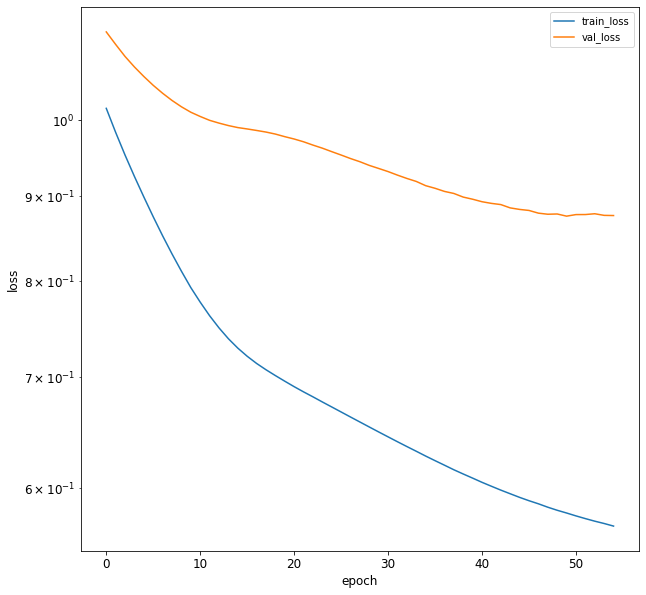

In [33]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [34]:
test = stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
8354,2943.0,25.687452,56.780377,1.0,1.0,0.0,3040.0,3204.0,3186.0,2170.0,3188.0,3383.0,3099.583333
8355,2937.0,24.952452,59.723930,1.0,1.0,0.0,3054.0,3211.0,3179.0,2202.0,3173.0,3381.0,3079.416667
8356,2893.0,24.952452,59.723930,2.0,1.0,0.0,3028.0,3186.0,3161.0,2222.0,3151.0,3347.0,3057.083333
8357,2899.0,24.952452,59.723930,2.0,1.0,0.0,2928.0,3071.0,3190.0,2240.0,3107.0,3311.0,3032.833333
8358,2928.0,24.757451,60.137898,2.0,1.0,0.0,2943.0,3040.0,3204.0,2249.0,3073.0,3363.0,3009.833333
8359,2916.0,24.562450,60.551865,2.0,1.0,0.0,2937.0,3054.0,3211.0,2261.0,2960.0,3289.0,2985.250000
8360,2891.0,24.562450,60.551865,3.0,1.0,0.0,2893.0,3028.0,3186.0,2297.0,2934.0,3202.0,2960.666667
8361,2920.0,24.562450,60.551865,3.0,1.0,0.0,2899.0,2928.0,3071.0,2329.0,2911.0,3082.0,2948.083333
8362,2918.0,24.052451,61.554868,3.0,1.0,0.0,2928.0,2943.0,3040.0,2382.0,2904.0,2909.0,2937.916667
8363,2924.0,23.542452,62.557870,3.0,1.0,0.0,2916.0,2937.0,3054.0,2416.0,2878.0,2659.0,2927.083333


In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 8354 to 8565
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


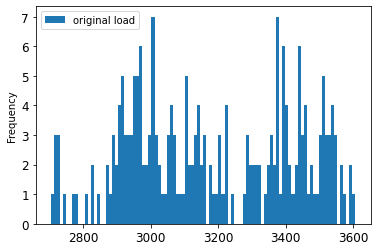

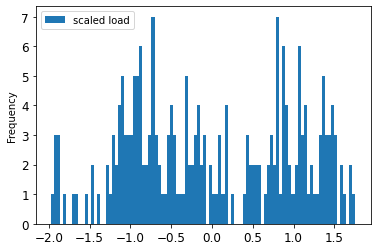

In [36]:
stlf_data[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=8354) & (test.index <= 8565)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [37]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
8354,-0.986474,-1.035197,1.140073,-1.498364,-1.004934,-0.340279,-0.560681,0.137902,0.081297,-2.780206,0.925882,0.834676,-0.321397,-0.180481
8355,-1.011274,-1.164071,1.316386,-1.498364,-1.004934,-0.340279,-0.502903,0.167088,0.051843,-2.660613,0.888294,0.830566,-0.408236,-0.213547
8356,-1.193139,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-0.610204,0.062855,-0.023897,-2.585868,0.833166,0.760705,-0.504405,-0.321013
8357,-1.168340,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-1.022899,-0.416618,0.098128,-2.518596,0.722909,0.686735,-0.608827,-0.312747
8358,-1.048474,-1.198263,1.341182,-1.357685,-1.004934,-0.340279,-0.960994,-0.545867,0.157036,-2.484961,0.637711,0.793581,-0.707866,-0.197014
8359,-1.098073,-1.232454,1.365978,-1.357685,-1.004934,-0.340279,-0.985756,-0.487496,0.186490,-2.440113,0.354552,0.641531,-0.813724,-0.106082
8360,-1.201406,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.167342,-0.595899,0.081297,-2.305571,0.289400,0.462770,-0.919581,-0.089548
8361,-1.081540,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.142580,-1.012831,-0.402593,-2.185978,0.231766,0.216202,-0.973766,-0.217681
8362,-1.089807,-1.321876,1.426055,-1.217006,-1.004934,-0.340279,-1.022899,-0.950291,-0.533033,-1.987902,0.214225,-0.139266,-1.017544,-0.275547
8363,-1.065007,-1.411299,1.486133,-1.217006,-1.004934,-0.340279,-1.072422,-0.975307,-0.474125,-1.860834,0.149073,-0.652948,-1.064193,-0.135015


In [38]:
for t in range(1, T+1):
    test_shifted['Cons_t-'+str(T-t)] = test_shifted['Cons'].shift(T-t)
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8354,-0.986474,-1.035197,1.140073,-1.498364,-1.004934,-0.340279,-0.560681,0.137902,0.081297,-2.780206,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474
8355,-1.011274,-1.164071,1.316386,-1.498364,-1.004934,-0.340279,-0.502903,0.167088,0.051843,-2.660613,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274
8356,-1.193139,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-0.610204,0.062855,-0.023897,-2.585868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139
8357,-1.168340,-1.164071,1.316386,-1.357685,-1.004934,-0.340279,-1.022899,-0.416618,0.098128,-2.518596,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340
8358,-1.048474,-1.198263,1.341182,-1.357685,-1.004934,-0.340279,-0.960994,-0.545867,0.157036,-2.484961,...,NaN,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474
8359,-1.098073,-1.232454,1.365978,-1.357685,-1.004934,-0.340279,-0.985756,-0.487496,0.186490,-2.440113,...,NaN,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073
8360,-1.201406,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.167342,-0.595899,0.081297,-2.305571,...,NaN,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406
8361,-1.081540,-1.232454,1.365978,-1.217006,-1.004934,-0.340279,-1.142580,-1.012831,-0.402593,-2.185978,...,NaN,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540
8362,-1.089807,-1.321876,1.426055,-1.217006,-1.004934,-0.340279,-1.022899,-0.950291,-0.533033,-1.987902,...,NaN,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807
8363,-1.065007,-1.411299,1.486133,-1.217006,-1.004934,-0.340279,-1.072422,-0.975307,-0.474125,-1.860834,...,-0.986474,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007


In [39]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.head(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,...,Cons_t-9,Cons_t-8,Cons_t-7,Cons_t-6,Cons_t-5,Cons_t-4,Cons_t-3,Cons_t-2,Cons_t-1,Cons_t-0
8364,-1.085674,-1.411299,1.486133,-1.076327,-1.004934,-0.340279,-1.175596,-1.158758,-0.583526,-1.808512,...,-1.011274,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007,-1.085674
8365,-1.197273,-1.411299,1.486133,-1.076327,-1.004934,-0.340279,-1.055914,-1.133742,-1.004300,-1.860834,...,-1.193139,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007,-1.085674,-1.197273
8366,-1.189006,-1.418313,1.543818,-1.076327,-1.004934,-0.340279,-1.064168,-1.012831,-0.941184,-1.789825,...,-1.168340,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007,-1.085674,-1.197273,-1.189006
8367,-1.040207,-1.425326,1.601503,-1.076327,-1.004934,-0.340279,-1.039406,-1.062863,-0.966430,-1.786088,...,-1.048474,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007,-1.085674,-1.197273,-1.189006,-1.040207
8368,-1.135273,-1.425326,1.601503,-0.935648,-1.004934,-0.340279,-1.060041,-1.167096,-1.151570,-1.857097,...,-1.098073,-1.201406,-1.081540,-1.089807,-1.065007,-1.085674,-1.197273,-1.189006,-1.040207,-1.135273


In [40]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
8364,-0.147415
8365,-0.486345
8366,-0.527678
8367,-0.494612
8368,-0.726076
...,...
8461,0.890044
8462,0.728845
8463,0.534580
8464,0.555246


In [41]:
X_test = test_shifted[['Cons_original','Cons_t-0','Cons_t-1','Cons_t-2','Cons_t-3','Cons_t-4','Cons_t-5','Cons_t-6','Cons_t-7','Cons_t-8', 'Cons_t-9','Cons_t-10','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Cons_t-0,Cons_t-1,Cons_t-2,Cons_t-3,Cons_t-4,Cons_t-5,Cons_t-6,Cons_t-7,Cons_t-8,...,A,B,C,D,E,F,G,H,I,J
8364,-1.085674,-1.085674,-1.065007,-1.089807,-1.081540,-1.201406,-1.098073,-1.048474,-1.168340,-1.193139,...,-1.076327,-1.004934,-0.340279,-1.175596,-1.158758,-0.583526,-1.808512,0.176638,-0.784451,-1.103306
8365,-1.197273,-1.197273,-1.085674,-1.065007,-1.089807,-1.081540,-1.201406,-1.098073,-1.048474,-1.168340,...,-1.076327,-1.004934,-0.340279,-1.055914,-1.133742,-1.004300,-1.860834,0.001229,-0.926227,-1.116225
8366,-1.189006,-1.189006,-1.197273,-1.085674,-1.065007,-1.089807,-1.081540,-1.201406,-1.098073,-1.048474,...,-1.076327,-1.004934,-0.340279,-1.064168,-1.012831,-0.941184,-1.789825,-0.159144,-0.726919,-1.133808
8367,-1.040207,-1.040207,-1.189006,-1.197273,-1.085674,-1.065007,-1.089807,-1.081540,-1.201406,-1.098073,...,-1.076327,-1.004934,-0.340279,-1.039406,-1.062863,-0.966430,-1.786088,-0.301977,-0.513227,-1.136319
8368,-1.135273,-1.135273,-1.040207,-1.189006,-1.197273,-1.085674,-1.065007,-1.089807,-1.081540,-1.201406,...,-0.935648,-1.004934,-0.340279,-1.060041,-1.167096,-1.151570,-1.857097,-0.527502,-0.490625,-1.131296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8461,-0.217681,-0.217681,-0.089548,-0.106082,-0.197014,-0.312747,-0.321013,-0.213547,-0.180481,-0.349946,...,-1.076327,0.516823,-0.340279,-0.288302,-0.308215,-0.166960,-0.081885,-1.008622,-0.324192,-0.212310
8462,-0.275547,-0.275547,-0.217681,-0.089548,-0.106082,-0.197014,-0.312747,-0.321013,-0.213547,-0.180481,...,-1.076327,0.516823,-0.340279,-0.172748,-0.137273,-0.196414,-0.074411,-0.961011,-0.455694,-0.214105
8463,-0.135015,-0.135015,-0.275547,-0.217681,-0.089548,-0.106082,-0.197014,-0.312747,-0.321013,-0.213547,...,-1.076327,0.516823,-0.340279,-0.081955,-0.170628,-0.217453,0.060132,-0.958505,-0.572814,-0.201904
8464,-0.147415,-0.147415,-0.135015,-0.275547,-0.217681,-0.089548,-0.106082,-0.197014,-0.312747,-0.321013,...,-0.935648,0.516823,-0.340279,-0.065447,-0.279030,-0.238491,-0.025826,-1.006116,-0.757740,-0.188986


In [42]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [43]:
X_test=np.atleast_3d(X_test)
X_test.shape

(102, 24, 1)

In [44]:
#subsequences=2
#X_test=X_test//subsequences
#X_test=X_test.reshape(1488,subsequences,12,1)
#print(X_test.shape)
X_test=X_test.reshape(102,2,1,12)

In [45]:
import time
start=time.time()
predictions = model.predict(X_test)
stop = time.time()
predictions
print(f"Test time: {stop - start}s")

Training time: 0.7780444622039795s


In [46]:
feature=stlf_data.copy()[(stlf_data.index >= 8354) & (stlf_data.index <=8565)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    3181.665094
dtype: float64
Cons    242.510089
dtype: float64


In [47]:
load_mean=3181.665094
load_std=242.510089
rescaled_target_load=(y_test*load_std)+load_mean
rescaled_target_load

,y_t+100
8364,3145.915585
8365,3063.721502
8366,3053.697833
8367,3061.716768
8368,3005.584224
...,...
8461,3397.509669
8462,3358.417361
8463,3311.306118
8464,3316.317953


In [48]:
rescaled_predicted_load=(predictions*load_std)+load_mean
rescaled_predicted_load

array([[2991.256 ],
       [2993.3848],
       [2995.1467],
       [2999.1843],
       [2998.6748],
       [2984.6287],
       [2978.0923],
       [2974.707 ],
       [2968.751 ],
       [2948.302 ],
       [2946.7695],
       [2942.4946],
       [2940.5742],
       [2936.0088],
       [2948.3984],
       [2958.5537],
       [2969.2512],
       [2982.6497],
       [3001.641 ],
       [3022.3406],
       [3035.6213],
       [3053.6262],
       [3076.6353],
       [3104.6318],
       [3121.6973],
       [3130.0803],
       [3153.496 ],
       [3160.5789],
       [3158.5962],
       [3161.9912],
       [3183.6316],
       [3192.542 ],
       [3200.473 ],
       [3195.498 ],
       [3185.8508],
       [3181.1436],
       [3184.856 ],
       [3193.29  ],
       [3209.345 ],
       [3227.6118],
       [3241.4355],
       [3233.3013],
       [3230.2654],
       [3235.1997],
       [3233.206 ],
       [3237.352 ],
       [3253.8503],
       [3261.2092],
       [3257.313 ],
       [3253.1816],


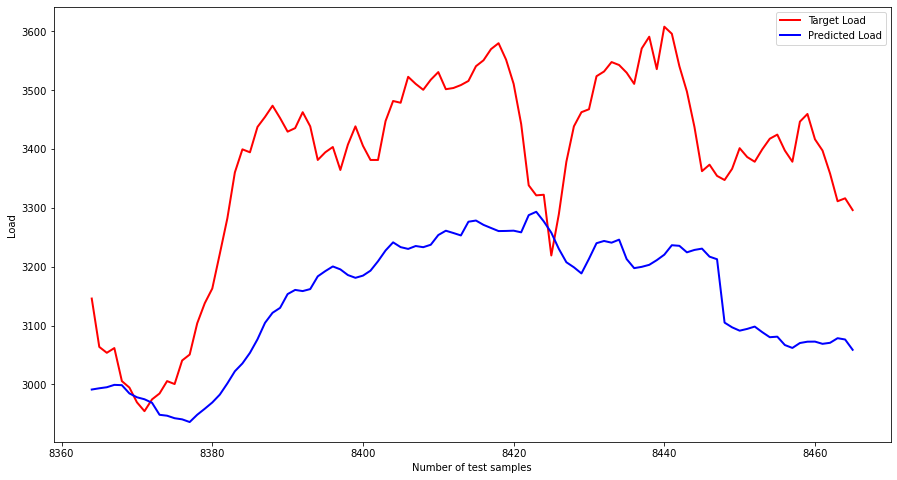

In [49]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

6.762310221519664


In [51]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100    6.719573
dtype: float64


In [52]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
8364  314496.474710
8365  306274.445991
8366  305271.700713
8367  306073.719221
8368  300458.652251
...             ...
8461  339660.638101
8462  335750.303635
8463  331037.642203
8464  331539.032792
8465  329534.266572

[102 rows x 1 columns]


In [53]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
8364   23919.555246
8365    4947.256480
8366    3428.231871
8367    3910.306310
8368      47.740070
...             ...
8461  107965.125026
8462   82790.580333
8463   54194.596476
8464   57609.414501
8465   56405.257329

[102 rows x 1 columns]
y_t+100    64560.703521
dtype: float64


In [54]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    254.087984
dtype: float64


In [55]:
a=np.array(rescaled_predicted_load)

In [56]:
for i in  range(0,102):
    b=a[i]
    print(b)

[2991.256]
[2993.3848]
[2995.1467]
[2999.1843]
[2998.6748]
[2984.6287]
[2978.0923]
[2974.707]
[2968.751]
[2948.302]
[2946.7695]
[2942.4946]
[2940.5742]
[2936.0088]
[2948.3984]
[2958.5537]
[2969.2512]
[2982.6497]
[3001.641]
[3022.3406]
[3035.6213]
[3053.6262]
[3076.6353]
[3104.6318]
[3121.6973]
[3130.0803]
[3153.496]
[3160.5789]
[3158.5962]
[3161.9912]
[3183.6316]
[3192.542]
[3200.473]
[3195.498]
[3185.8508]
[3181.1436]
[3184.856]
[3193.29]
[3209.345]
[3227.6118]
[3241.4355]
[3233.3013]
[3230.2654]
[3235.1997]
[3233.206]
[3237.352]
[3253.8503]
[3261.2092]
[3257.313]
[3253.1816]
[3276.4985]
[3278.5034]
[3271.143]
[3265.8406]
[3260.603]
[3260.8157]
[3261.2659]
[3258.4636]
[3287.6455]
[3293.3882]
[3277.064]
[3257.88]
[3230.3584]
[3207.6152]
[3199.0286]
[3188.5989]
[3213.4185]
[3239.9731]
[3243.7805]
[3240.8828]
[3246.0325]
[3212.9976]
[3197.5913]
[3199.7852]
[3203.2136]
[3211.1667]
[3220.4812]
[3236.5464]
[3235.5352]
[3224.4624]
[3228.5427]
[3230.7573]
[3217.1343]
[3212.7178]
[3104.9963]
[